<a href="https://colab.research.google.com/github/shibilakp/loan-application-notebook/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Please ensure the file 'loan_approval.csv' is uploaded to your Colab environment and the path is correct.
df = pd.read_csv("/content/loan_approval.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


preprocessing

In [7]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1


In [8]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1
44999,24,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3,628,No,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   44999 non-null  object 
 2   person_education                44997 non-null  object 
 3   person_income                   44999 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           44998 non-null  object 
 6   loan_amnt                       44998 non-null  float64
 7   loan_intent                     44999 non-null  object 
 8   loan_int_rate                   44999 non-null  float64
 9   loan_percent_income             44997 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [10]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.499900e+04,45000.000000,4.499800e+04,44999.000000,44997.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031762e+04,5.410333,9.635541e+03,11.012625,0.139729,5.867489,632.608756,0.222222
std,6.045108,8.042282e+04,6.063532,1.332906e+04,3.182025,0.087213,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,-3.000000e+03,-40.000000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720200e+04,1.000000,5.000000e+03,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8.000000e+03,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578600e+04,8.000000,1.223050e+04,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,2.500000e+06,200.000000,0.660000,30.000000,850.000000,1.000000


In [11]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [49]:
df.shape

(29714, 14)

checking null

In [12]:
df.isna()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

,0
person_age,0
person_gender,1
person_education,3
person_income,1
person_emp_exp,0
person_home_ownership,2
loan_amnt,2
loan_intent,1
loan_int_rate,1
loan_percent_income,3


In [14]:
df.dropna(inplace=True)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6,604,No,1


In [15]:
df.duplicated().sum()

np.int64(0)

boxploting

In [16]:
#plt.boxplot(df['person_age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7e45378a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7e45347690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7e4536b750>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7e45345b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7e45344f50>],
 'means': []}

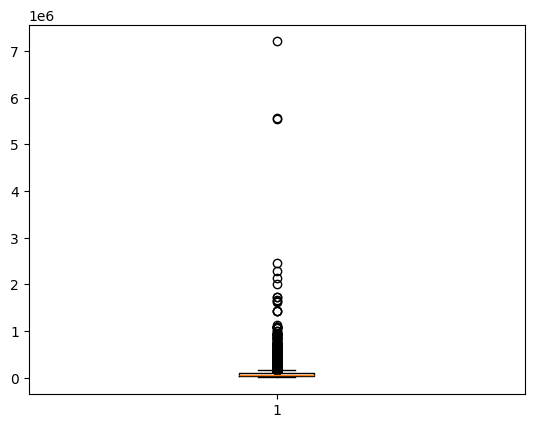

In [17]:
plt.boxplot(df['person_income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7e450aad50>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7e450bc210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7e450aa3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7e450bd6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7e450be010>],
 'means': []}

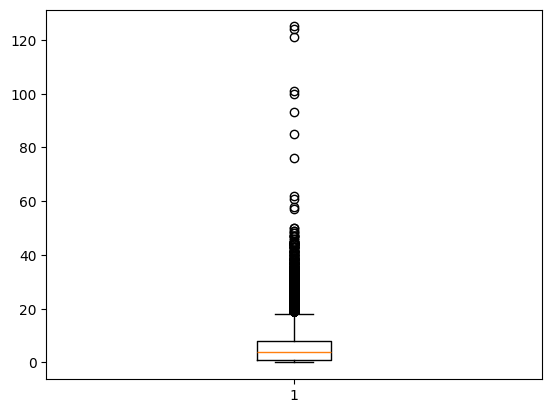

In [18]:
plt.boxplot(df['person_emp_exp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7e42f1c210>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7e42f1d590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7e42f0f850>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7e42f1e990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7e42f1f290>],
 'means': []}

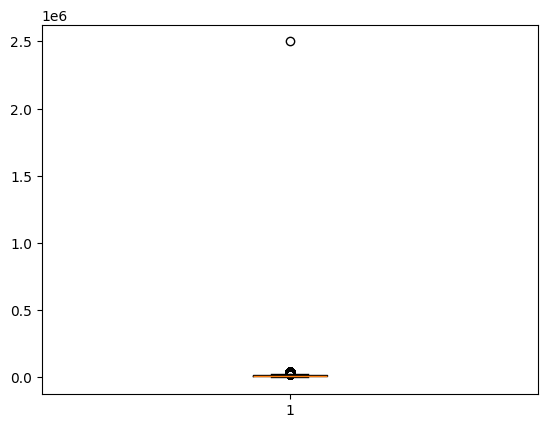

In [19]:
plt.boxplot(df['loan_amnt'])

In [20]:
#plt.boxplot(df['loan_int_rate'])

In [21]:
#plt.boxplot(df['loan_percent_income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7e42f75810>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7e42f76b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7e42f74e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7e42f77f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7e42f8c950>],
 'means': []}

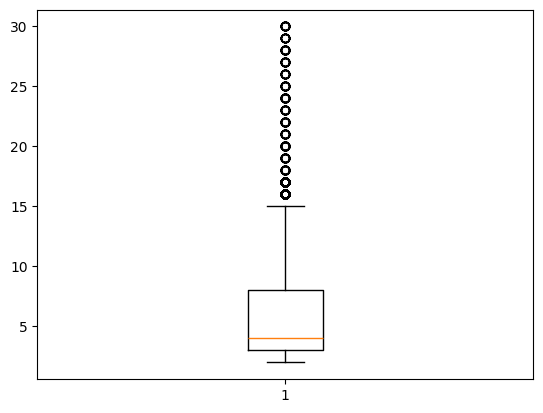

In [22]:
plt.boxplot(df['cb_person_cred_hist_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7e42fcf210>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7e42fd8550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e7e42fce9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7e42fd9a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7e42fda2d0>],
 'means': []}

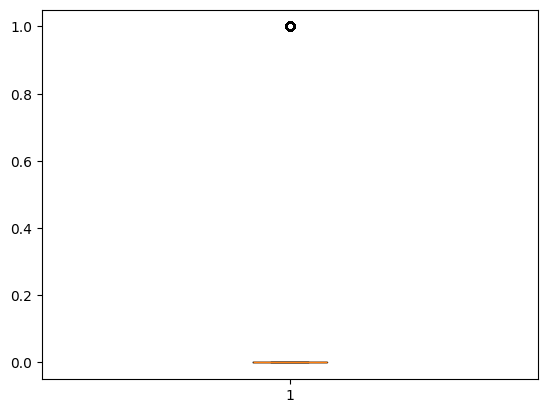

In [23]:
plt.boxplot(df['loan_status'])

In [24]:
#plt.boxplot(df['credit_score'])

Handling outliers

In [25]:
#df['person_age'] = pd.to_numeric(df['person_age'])
#Q1=df['person_age'].quantile(0.25)
#Q3=df['person_age'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['person_age']<(lowerbound))|(
        #df['person_age']>(upperbound)))]

In [26]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['person_age'])
#plt.show()

In [27]:
df['person_income'] = pd.to_numeric(df['person_income'])
Q1=df['person_income'].quantile(0.25)
Q3=df['person_income'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['person_income']<(lowerbound))|(
        df['person_income']>(upperbound)))]

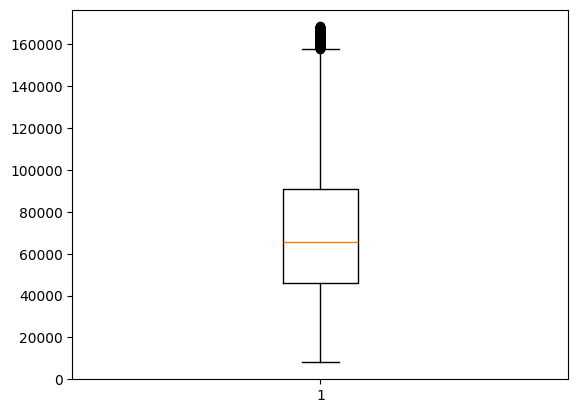

In [28]:
import matplotlib.pyplot as plt
plt.boxplot(df['person_income'])
plt.show()

In [29]:
df['person_emp_exp'] = pd.to_numeric(df['person_emp_exp'])
Q1=df['person_emp_exp'].quantile(0.25)
Q3=df['person_emp_exp'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['person_emp_exp']<(lowerbound))|(
        df['person_emp_exp']>(upperbound)))]

/tmp/ipython-input-29-8298735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_emp_exp'] = pd.to_numeric(df['person_emp_exp'])


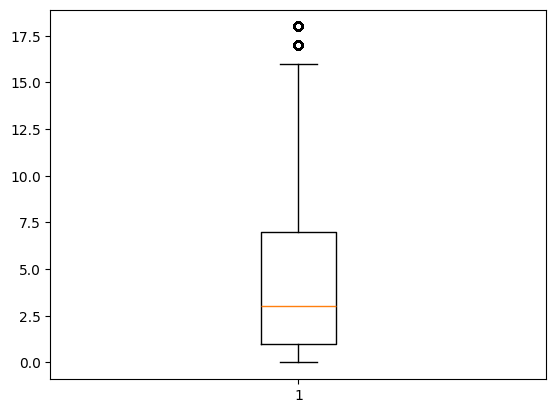

In [30]:
import matplotlib.pyplot as plt
plt.boxplot(df['person_emp_exp'])
plt.show()

In [31]:
df['loan_status'] = pd.to_numeric(df['loan_status'])
Q1=df['loan_status'].quantile(0.25)
Q3=df['loan_status'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['loan_status']<(lowerbound))|(
        df['loan_status']>(upperbound)))]

/tmp/ipython-input-31-4206483199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'] = pd.to_numeric(df['loan_status'])


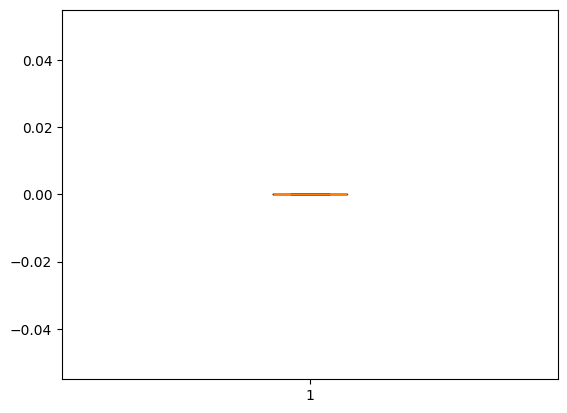

In [32]:
import matplotlib.pyplot as plt
plt.boxplot(df['loan_status'])
plt.show()

In [33]:
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'])
Q1=df['loan_amnt'].quantile(0.25)
Q3=df['loan_amnt'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['loan_amnt']<(lowerbound))|(
        df['loan_amnt']>(upperbound)))]

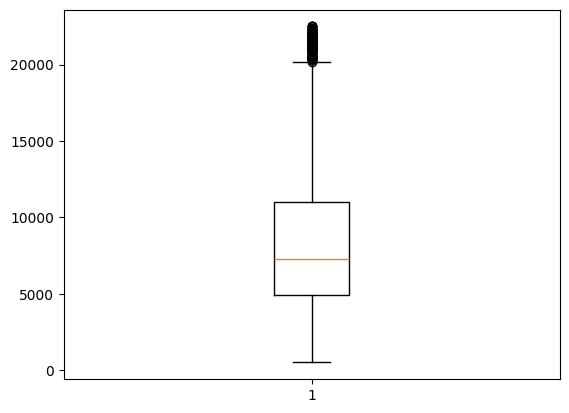

In [34]:
import matplotlib.pyplot as plt
plt.boxplot(df['loan_amnt'])
plt.show()

In [35]:
#df['loan_int_rate'] = pd.to_numeric(df['loan_int_rate'])
#Q1=df['loan_int_rate'].quantile(0.25)
#Q3=df['loan_int_rate'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['loan_int_rate']<(lowerbound))|(
        #df['loan_int_rate']>(upperbound)))]

In [36]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['loan_int_rate'])
#plt.show()

In [37]:
#df['loan_percent_income'] = pd.to_numeric(df['loan_percent_income'])
#Q1=df['loan_percent_income'].quantile(0.25)
#Q3=df['loan_percent_income'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['loan_percent_income']<(lowerbound))|(
        #df['loan_percent_income']>(upperbound)))]

In [38]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['loan_percent_income'])
#plt.show()

In [39]:
df['cb_person_cred_hist_length'] = pd.to_numeric(df['cb_person_cred_hist_length'])
Q1=df['cb_person_cred_hist_length'].quantile(0.25)
Q3=df['cb_person_cred_hist_length'].quantile(0.75)
IQR=Q3-Q1

lowerbound=Q1-(IQR*1.5)
upperbound=Q3+(IQR*1.5)

df=df[~
    ((df['cb_person_cred_hist_length']<(lowerbound))|(
        df['cb_person_cred_hist_length']>(upperbound)))]

/tmp/ipython-input-39-2266440808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cb_person_cred_hist_length'] = pd.to_numeric(df['cb_person_cred_hist_length'])


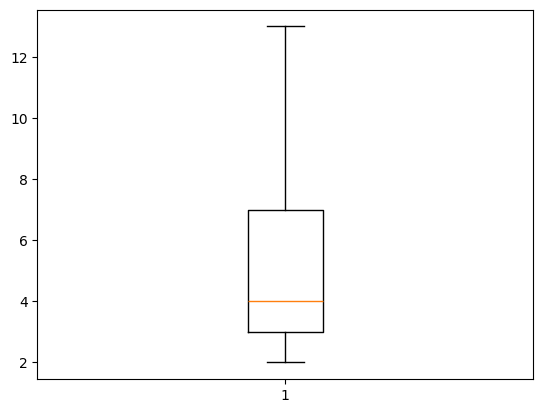

In [40]:
import matplotlib.pyplot as plt
plt.boxplot(df['cb_person_cred_hist_length'])
plt.show()

In [41]:
#df['credit_score'] = pd.to_numeric(df['credit_score'])
#Q1=df['credit_score'].quantile(0.25)
#Q3=df['credit_score'].quantile(0.75)
#IQR=Q3-Q1

#lowerbound=Q1-(IQR*1.5)
#upperbound=Q3+(IQR*1.5)

#df=df[~
    #((df['credit_score']<(lowerbound))|(
        #df['credit_score']>(upperbound)))]

In [42]:
#import matplotlib.pyplot as plt
#plt.boxplot(df['credit_score'])
#plt.show()

label encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_gender'] = le.fit_transform(df['person_gender'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
23,24,0,Bachelor,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3,600,Yes,0
27,23,1,High School,14293.0,0,OWN,1400.0,PERSONAL,9.32,0.10,3,607,No,0
59,24,1,Associate,15229.0,1,OWN,1750.0,VENTURE,11.01,0.11,3,631,Yes,0
65,22,1,Associate,15013.0,0,MORTGAGE,1500.0,EDUCATION,14.84,0.10,3,688,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42102,28,0,Associate,36900.0,6,RENT,2000.0,VENTURE,5.77,0.05,6,526,Yes,0
42103,36,1,Bachelor,60006.0,15,OWN,2755.0,MEDICAL,8.92,0.05,9,609,Yes,0
42104,25,0,Bachelor,64146.0,2,MORTGAGE,7200.0,VENTURE,10.28,0.11,3,625,Yes,0
42106,28,0,High School,110291.0,7,RENT,13453.0,VENTURE,13.29,0.12,6,631,Yes,0


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_education'] = le.fit_transform(df['person_education'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
23,24,0,1,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3,600,Yes,0
27,23,1,3,14293.0,0,OWN,1400.0,PERSONAL,9.32,0.10,3,607,No,0
59,24,1,0,15229.0,1,OWN,1750.0,VENTURE,11.01,0.11,3,631,Yes,0
65,22,1,0,15013.0,0,MORTGAGE,1500.0,EDUCATION,14.84,0.10,3,688,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42102,28,0,0,36900.0,6,RENT,2000.0,VENTURE,5.77,0.05,6,526,Yes,0
42103,36,1,1,60006.0,15,OWN,2755.0,MEDICAL,8.92,0.05,9,609,Yes,0
42104,25,0,1,64146.0,2,MORTGAGE,7200.0,VENTURE,10.28,0.11,3,625,Yes,0
42106,28,0,3,110291.0,7,RENT,13453.0,VENTURE,13.29,0.12,6,631,Yes,0


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,EDUCATION,11.14,0.08,2,504,Yes,0
23,24,0,1,13866.0,0,2,1500.0,PERSONAL,7.29,0.11,3,600,Yes,0
27,23,1,3,14293.0,0,2,1400.0,PERSONAL,9.32,0.10,3,607,No,0
59,24,1,0,15229.0,1,2,1750.0,VENTURE,11.01,0.11,3,631,Yes,0
65,22,1,0,15013.0,0,0,1500.0,EDUCATION,14.84,0.10,3,688,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42102,28,0,0,36900.0,6,3,2000.0,VENTURE,5.77,0.05,6,526,Yes,0
42103,36,1,1,60006.0,15,2,2755.0,MEDICAL,8.92,0.05,9,609,Yes,0
42104,25,0,1,64146.0,2,0,7200.0,VENTURE,10.28,0.11,3,625,Yes,0
42106,28,0,3,110291.0,7,3,13453.0,VENTURE,13.29,0.12,6,631,Yes,0


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2,504,Yes,0
23,24,0,1,13866.0,0,2,1500.0,4,7.29,0.11,3,600,Yes,0
27,23,1,3,14293.0,0,2,1400.0,4,9.32,0.10,3,607,No,0
59,24,1,0,15229.0,1,2,1750.0,5,11.01,0.11,3,631,Yes,0
65,22,1,0,15013.0,0,0,1500.0,1,14.84,0.10,3,688,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42102,28,0,0,36900.0,6,3,2000.0,5,5.77,0.05,6,526,Yes,0
42103,36,1,1,60006.0,15,2,2755.0,3,8.92,0.05,9,609,Yes,0
42104,25,0,1,64146.0,2,0,7200.0,5,10.28,0.11,3,625,Yes,0
42106,28,0,3,110291.0,7,3,13453.0,5,13.29,0.12,6,631,Yes,0


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2,504,1,0
23,24,0,1,13866.0,0,2,1500.0,4,7.29,0.11,3,600,1,0
27,23,1,3,14293.0,0,2,1400.0,4,9.32,0.10,3,607,0,0
59,24,1,0,15229.0,1,2,1750.0,5,11.01,0.11,3,631,1,0
65,22,1,0,15013.0,0,0,1500.0,1,14.84,0.10,3,688,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42102,28,0,0,36900.0,6,3,2000.0,5,5.77,0.05,6,526,1,0
42103,36,1,1,60006.0,15,2,2755.0,3,8.92,0.05,9,609,1,0
42104,25,0,1,64146.0,2,0,7200.0,5,10.28,0.11,3,625,1,0
42106,28,0,3,110291.0,7,3,13453.0,5,13.29,0.12,6,631,1,0


In [48]:
df.corr()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,-0.005406,-0.029673,0.090955,0.902760,-0.029316,0.039125,0.029768,0.013329,-0.022242,0.803661,0.128646,-0.028683,NaN
person_gender,-0.005406,1.000000,-0.004103,0.017650,-0.011323,0.001548,0.006454,-0.007224,-0.001457,-0.005732,-0.007852,-0.005288,0.005312,NaN
person_education,-0.029673,-0.004103,1.000000,0.006543,-0.025846,0.000164,0.001630,0.007237,-0.000166,-0.002610,-0.026903,0.021325,-0.007775,NaN
person_income,0.090955,0.017650,0.006543,1.000000,0.074757,-0.307323,0.367059,-0.014926,-0.018740,-0.322795,0.058444,0.009811,-0.006597,NaN
person_emp_exp,0.902760,-0.011323,-0.025846,0.074757,1.000000,-0.027680,0.034059,0.026545,0.017689,-0.016507,0.731393,0.139462,-0.033840,NaN
person_home_ownership,-0.029316,0.001548,0.000164,-0.307323,-0.027680,1.000000,-0.173840,0.004046,0.117263,0.017672,-0.022757,-0.004707,-0.000737,NaN
loan_amnt,0.039125,0.006454,0.001630,0.367059,0.034059,-0.173840,1.000000,0.004323,0.077925,0.682452,0.031346,-0.004211,0.004928,NaN
loan_intent,0.029768,-0.007224,0.007237,-0.014926,0.026545,0.004046,0.004323,1.000000,0.023676,0.019358,0.027344,0.014534,-0.001299,NaN
loan_int_rate,0.013329,-0.001457,-0.000166,-0.018740,0.017689,0.117263,0.077925,0.023676,1.000000,0.070626,0.019461,0.006422,-0.001237,NaN
loan_percent_income,-0.022242,-0.005732,-0.002610,-0.322795,-0.016507,0.017672,0.682452,0.019358,0.070626,1.000000,-0.006992,-0.010174,0.006498,NaN
